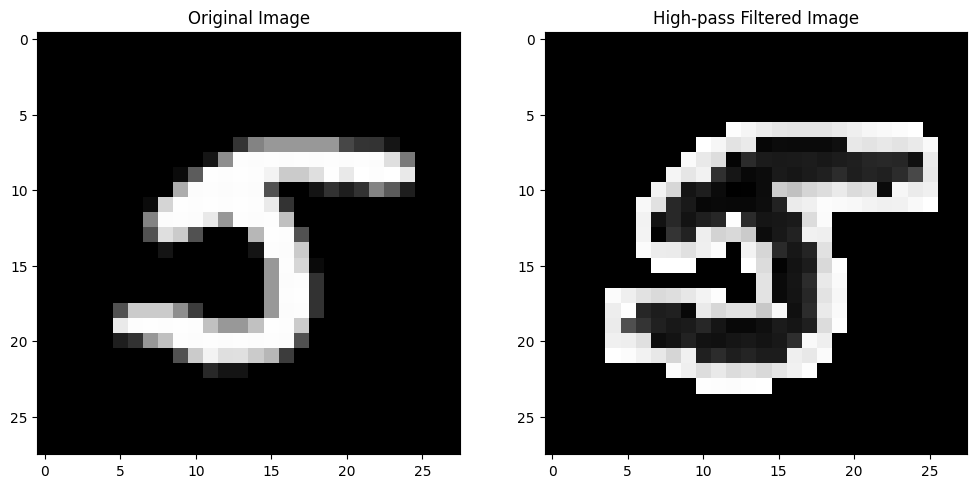

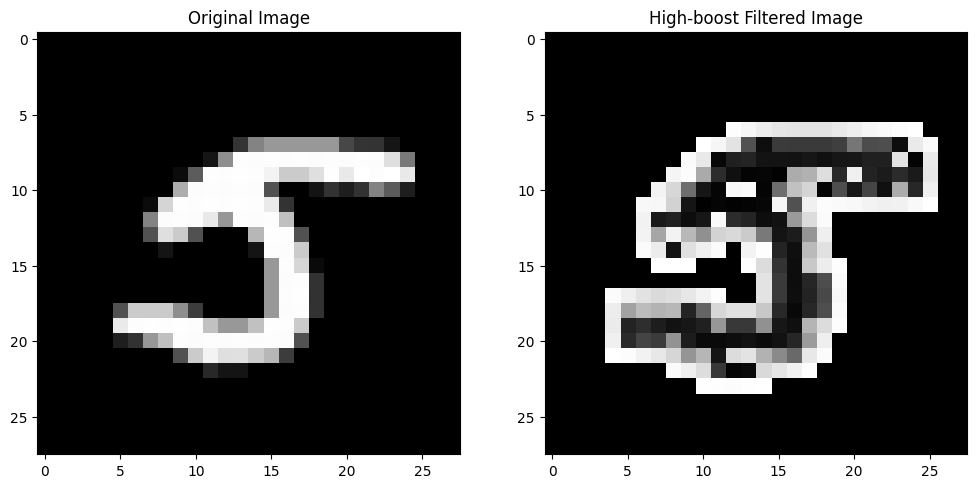

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

image_index = np.random.randint(0, test.shape[0])
image = test.iloc[image_index, 1:].values.reshape(28, 28).astype(np.uint8)

def convolve2d_scratch(image, kernel):
    if len(image.shape) == 3:
        image_height, image_width, image_channels = image.shape
        output_image = np.zeros_like(image)
        for channel in range(image_channels):
            output_image[:, :, channel] = convolve2d_scratch(image[:, :, channel], kernel)
        return output_image
    else:
        image_height, image_width = image.shape

    kernel_height, kernel_width = kernel.shape
    pad_y = kernel_height // 2
    pad_x = kernel_width // 2
    padded_image = np.pad(image, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant', constant_values=0)
    output_image = np.zeros_like(image)

    for y in range(image_height):
        for x in range(image_width):
            region = padded_image[y:y + kernel_height, x:x + kernel_width]
            output_image[y, x] = np.sum(region * kernel)

    return output_image

def high_pass_filter(image):
    low_pass_kernel = np.array([
        [-1, -1, -1],
        [-1, -8, -1],
        [-1, -1, -1],
    ]) / 9
    low_pass_kernel = low_pass_kernel / low_pass_kernel.sum()
    low_pass_image = convolve2d_scratch(image, low_pass_kernel)
    high_pass_image = image - low_pass_image
    return high_pass_image

def high_boost_filter(image, boost_factor=1.5):
    high_pass_image = high_pass_filter(image)
    high_boost_image = (image * (boost_factor - 1)) + high_pass_image
    return high_boost_image

filtered_image = high_pass_filter(image)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('High-pass Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()

boosted_image = high_boost_filter(image, boost_factor=3)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('High-boost Filtered Image')
plt.imshow(boosted_image, cmap='gray')
plt.show()


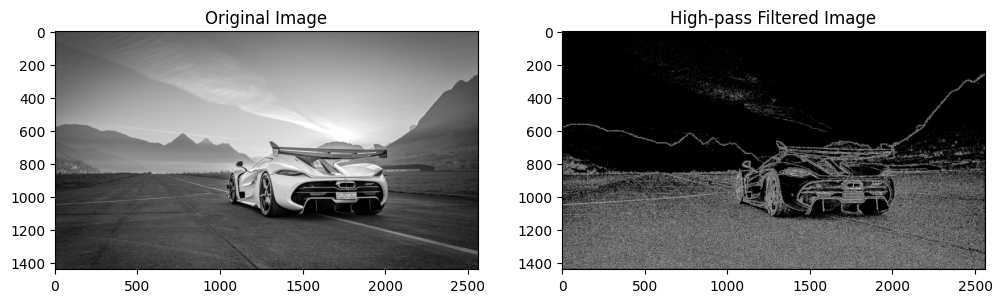

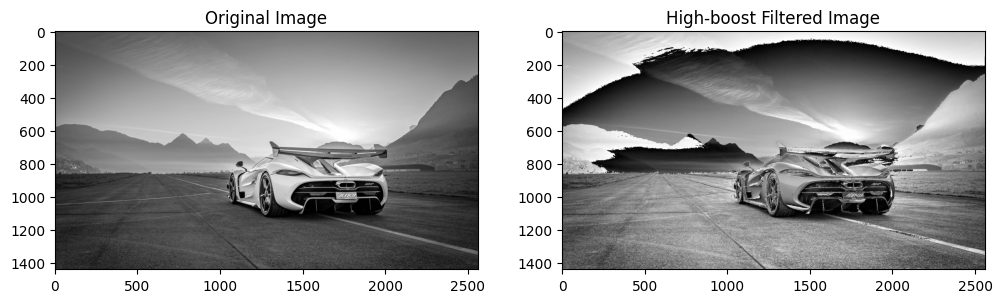

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_path = '1.jpg'
image = np.array(Image.open(image_path).convert('L'))

def convolve2d_scratch(image, kernel):
    if len(image.shape) == 3:
        image_height, image_width, image_channels = image.shape
        output_image = np.zeros_like(image)
        for channel in range(image_channels):
            output_image[:, :, channel] = convolve2d_scratch(image[:, :, channel], kernel)
        return output_image
    else:
        image_height, image_width = image.shape

    kernel_height, kernel_width = kernel.shape
    pad_y = kernel_height // 2
    pad_x = kernel_width // 2
    padded_image = np.pad(image, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant', constant_values=0)
    output_image = np.zeros_like(image)

    for y in range(image_height):
        for x in range(image_width):
            region = padded_image[y:y + kernel_height, x:x + kernel_width]
            output_image[y, x] = np.sum(region * kernel)

    return output_image

def high_pass_filter(image):
    low_pass_kernel = np.array([
        [-1, -1, -1],
        [-1, -8, -1],
        [-1, -1, -1],
    ]) / 9
    low_pass_kernel = low_pass_kernel / low_pass_kernel.sum()
    low_pass_image = convolve2d_scratch(image, low_pass_kernel)
    high_pass_image = image - low_pass_image
    return high_pass_image

def high_boost_filter(image, boost_factor=1.5):
    high_pass_image = high_pass_filter(image)
    high_boost_image = (image * (boost_factor - 1)) + high_pass_image
    return high_boost_image

filtered_image = high_pass_filter(image)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('High-pass Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()

boosted_image = high_boost_filter(image, boost_factor=3)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('High-boost Filtered Image')
plt.imshow(boosted_image, cmap='gray')
plt.show()
